<a href="https://colab.research.google.com/github/Bao1972002/Nguyen-Hai-Quoc-Bao-20104016/blob/main/nhandienkhuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')  

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!jupyter nbconvert --to html /content/nhandienkhuonmat.ipynb

[NbConvertApp] Converting notebook /content/nhandienkhuonmat.ipynb to html
[NbConvertApp] Writing 478269 bytes to /content/nhandienkhuonmat.html


In [ ]:
import os
train_image_files_path ='/content/drive/MyDrive/nhandienmat/Train'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
label = ['Trung','Triễn','Bảo']

In [ ]:
train_generator = train_datagen.flow_from_directory(train_image_files_path,target_size=(200,200),class_mode='categorical')

Found 160 images belonging to 3 classes.


In [ ]:
x_train,y_train=next(train_generator)

In [ ]:
x_train.shape

(32, 200, 200, 3)

In [ ]:
y_train.shape

(32, 3)

In [ ]:
x_train=x_train.reshape(32,120000)
x_train=x_train.astype ('float32')
x_train=x_train/255
x_train.shape

(32, 120000)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (120000,)))
model.add(layers.Dense(3,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               61440512  
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 61,442,051
Trainable params: 61,442,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs = 100, batch_size = 128)

Epoch 1/100
1/1 [==============================] - 1s 945ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 597ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 1s 589ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 1s 569ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 1s 573ms/step - loss: 9.9869e-04 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 1s 594ms/step - loss: 9.4879e-04 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 1s 580ms/step - loss: 9.0135e-04 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 1s 570ms/step - loss: 8.5626e-04 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 1s 609ms/step - loss: 8.1346e-04 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 1s 584ms/step - loss: 7.7285e-04 - ac

1/1 [==============================] - 0s 44ms/step
[[0. 1. 0.]]
1/1 [==============================] - 0s 43ms/step
Đây là: Triễn


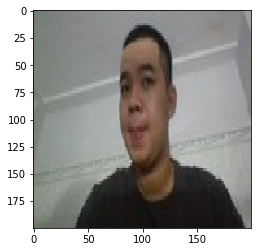

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/nhandienmat/Test/Triễn/Trien10.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])

1/1 [==============================] - 0s 50ms/step
[[0. 0. 1.]]
1/1 [==============================] - 0s 47ms/step
Đây là: Bảo


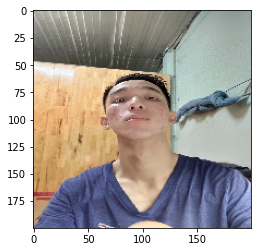

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/nhandienmat/Train/Trung/ae3ea06ee5243c7a653510.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])